<a href="https://colab.research.google.com/github/mitchelfalcon/AI-Studio/blob/main/Integraci%C3%B3nyDerivacionNumerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def v(t):
    termino_log = 140000 - 2100 * t
    if np.any(termino_log <= 0):
        raise ValueError("El argumento del logaritmo debe ser positivo.")
    return 2000 * np.log(140000 / termino_log) - 9.8 * t

class NumericalIntegrator:
    def __init__(self, f, a, b, n):
        self.f = f
        self.a = a
        self.b = b
        self.n = n

    def trapezoidal_rule(self):
        h = (self.b - self.a) / self.n
        x = np.linspace(self.a, self.b, self.n + 1)
        y = self.f(x)
        return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

    def simpsons_13_rule(self):
        if self.n % 2 != 0:
            raise ValueError("El número de segmentos 'n' debe ser par para Simpson 1/3.")
        h = (self.b - self.a) / self.n
        x = np.linspace(self.a, self.b, self.n + 1)
        y = self.f(x)
        sum_impares = np.sum(y[1:-1:2])
        sum_pares = np.sum(y[2:-2:2])
        return (h / 3) * (y[0] + 4 * sum_impares + 2 * sum_pares + y[-1])

    def romberg_integration(self, max_level=5):
        R = np.zeros((max_level, max_level), dtype=float)
        h = self.b - self.a
        R[0, 0] = (h / 2) * (self.f(self.a) + self.f(self.b))
        for k in range(1, max_level):
            h /= 2
            sum_val = np.sum(self.f(self.a + np.arange(1, 2**k, 2) * h))
            R[k, 0] = 0.5 * R[k - 1, 0] + sum_val * h
            for j in range(1, k + 1):
                R[k, j] = R[k, j - 1] + (R[k, j - 1] - R[k - 1, j - 1]) / (4**j - 1)
        return R[max_level - 1, max_level - 1]

    def gaussian_quadrature_3_point(self):
        puntos = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
        pesos = [5/9, 8/9, 5/9]
        transform_factor = (self.b - self.a) / 2
        shift_factor = (self.b + self.a) / 2
        integral = sum(p * self.f(transform_factor * w + shift_factor) for w, p in zip(puntos, pesos))
        return transform_factor * integral

def run_and_display_results():
    a = 8
    b = 30
    n = 10
    true_value = 11061.34

    print("🚀 **Cálculo de la Distancia Recorrida por el Cohete** 🚀")
    print(f"Intervalo de tiempo: de t={a}s a t={b}s")
    print(f"Valor verdadero de referencia: {true_value:.4f} m\n")

    integrator = NumericalIntegrator(f=v, a=a, b=b, n=n)

    print("="*40)
    print(f"📊 Método del Trapecio (con n={n} segmentos)")
    print("-"*40)
    trapezoidal_result = integrator.trapezoidal_rule()
    error_trapecio = abs(trapezoidal_result - true_value)
    print(f"Resultado: {trapezoidal_result:.4f} m")
    print(f"Error absoluto: {error_trapecio:.4f} m\n")

    print("="*40)
    print(f"📊 Método de Simpson 1/3 (con n={n} segmentos)")
    print("-"*40)
    try:
        simpson_result = integrator.simpsons_13_rule()
        error_simpson = abs(simpson_result - true_value)
        print(f"Resultado: {simpson_result:.4f} m")
        print(f"Error absoluto: {error_simpson:.4f} m\n")
    except ValueError as e:
        print(f"Error: {e}\n")

    print("="*40)
    print("📊 Integración de Romberg")
    print("-"*40)
    romberg_result = integrator.romberg_integration()
    error_romberg = abs(romberg_result - true_value)
    print(f"Resultado: {romberg_result:.4f} m")
    print(f"Error absoluto: {error_romberg:.4f} m\n")

    print("="*40)
    print("📊 Cuadratura Gaussiana (3 puntos)")
    print("-"*40)
    gaussian_result = integrator.gaussian_quadrature_3_point()
    error_gauss = abs(gaussian_result - true_value)
    print(f"Resultado: {gaussian_result:.4f} m")
    print(f"Error absoluto: {error_gauss:.4f} m\n")

run_and_display_results()

🚀 **Cálculo de la Distancia Recorrida por el Cohete** 🚀
Intervalo de tiempo: de t=8s a t=30s
Valor verdadero de referencia: 11061.3400 m

📊 Método del Trapecio (con n=10 segmentos)
----------------------------------------
Resultado: 11069.5835 m
Error absoluto: 8.2435 m

📊 Método de Simpson 1/3 (con n=10 segmentos)
----------------------------------------
Resultado: 11061.3435 m
Error absoluto: 0.0035 m

📊 Integración de Romberg
----------------------------------------
Resultado: 11061.3355 m
Error absoluto: 0.0045 m

📊 Cuadratura Gaussiana (3 puntos)
----------------------------------------
Resultado: 11061.3084 m
Error absoluto: 0.0316 m



🪂 Resultados del Paracaidista con el Método de Trapecio 🪂
--------------------------------------------------------------------------------
Tiempo (s)     Aceleración (m/s²)       Velocidad (m/s)     Distancia (m)       
--------------------------------------------------------------------------------
0.00           9.81                     0.00                0.00                
1.00           9.81                     9.81                4.91                
2.00           9.81                     19.62               19.62               
3.00           9.81                     29.43               44.14               
4.00           9.81                     39.24               78.48               
5.00           7.85                     48.07               122.13              
6.00           4.91                     54.45               173.39              
7.00           2.95                     58.38               229.81              
8.00           1.47                     60.59      

/tmp/ipython-input-2721227616.py:71: UserWarning: Glyph 129666 (\N{PARACHUTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129666 (\N{PARACHUTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


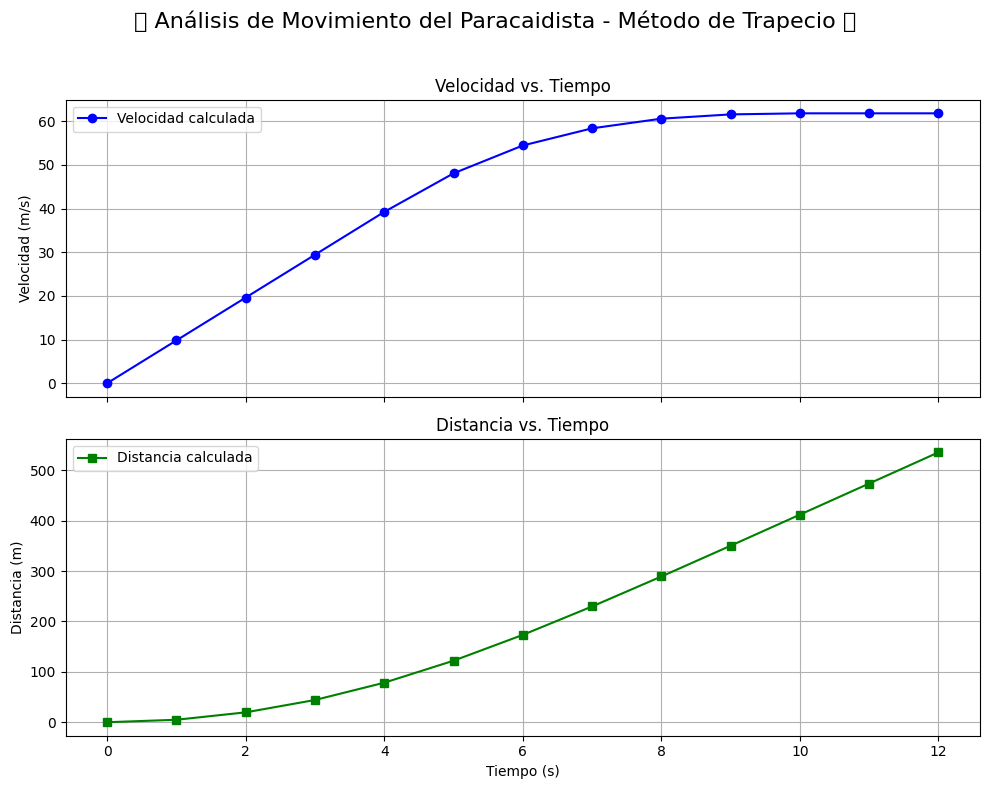

🪂 Resultados del Paracaidista con el Método de Simpson 1/3 🪂
--------------------------------------------------------------------------------
Tiempo (s)     Aceleración (m/s²)       Velocidad (m/s)     Distancia (m)       
--------------------------------------------------------------------------------
0.00           9.81                     0.00                0.00                
1.00           9.81                     9.81                9.81                
2.00           9.81                     19.62               19.62               
3.00           9.81                     29.43               49.05               
4.00           9.81                     39.24               78.48               
5.00           7.85                     46.93               125.41              
6.00           4.91                     54.61               172.33              
7.00           2.95                     57.64               229.98              
8.00           1.47                     60.67   

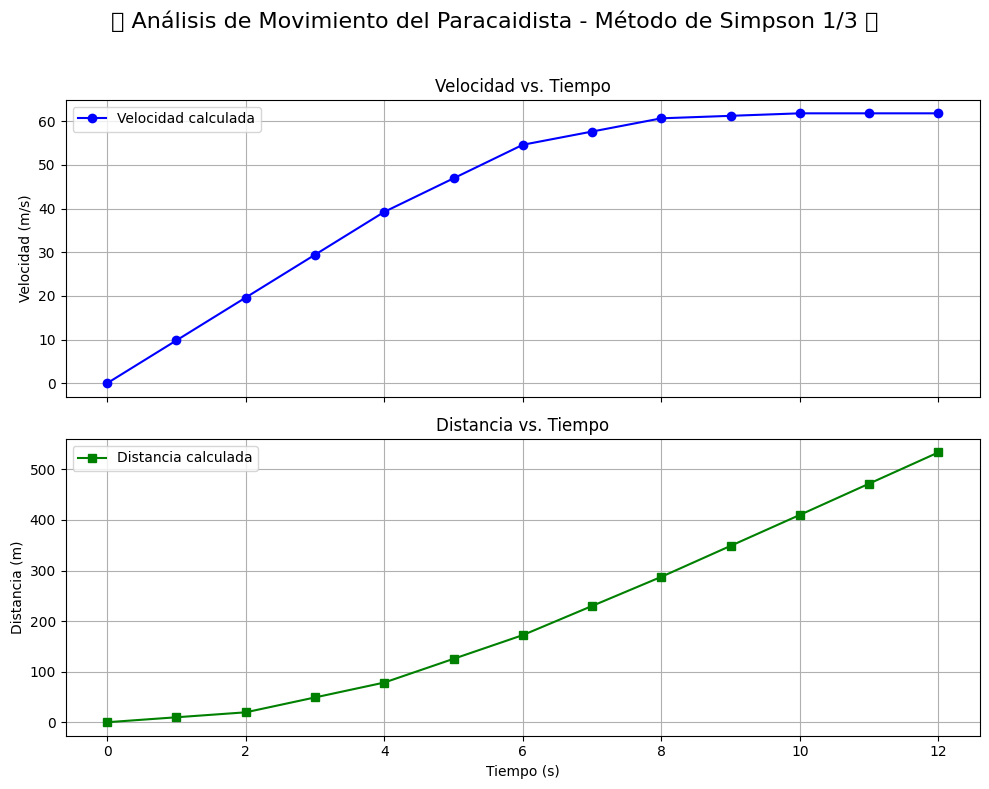

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class MotionAnalyzer:
    def __init__(self, time_data, acceleration_data):
        self.time = np.asarray(time_data, dtype=float)
        self.acceleration = np.asarray(acceleration_data, dtype=float)
        if len(self.time) != len(self.acceleration):
            raise ValueError("Los datos de tiempo y aceleración deben tener la misma longitud.")
        self.velocity = np.zeros_like(self.time)
        self.distance = np.zeros_like(self.time)

    def _trapezoidal_cumulative(self, x, y):
        integrals = np.zeros_like(y)
        for i in range(1, len(x)):
            h = x[i] - x[i-1]
            integral_segmento = (y[i] + y[i-1]) * h / 2
            integrals[i] = integrals[i-1] + integral_segmento
        return integrals

    def _simpsons_cumulative(self, x, y):
        if len(x) % 2 == 0:
             raise ValueError("La regla de Simpson requiere un número impar de puntos de datos.")
        integrals = np.zeros_like(y)
        for i in range(2, len(x), 2):
            h = x[i] - x[i-1]
            h_avg = (x[i] - x[i-2]) / 2
            integral_segmento = (h_avg / 3) * (y[i-2] + 4 * y[i-1] + y[i])
            integrals[i] = integrals[i-2] + integral_segmento
            integrals[i-1] = (integrals[i-2] + integrals[i])/2
        return integrals

    def analyze(self, method='trapezoid'):
        if method == 'trapezoid':
            self.velocity = self._trapezoidal_cumulative(self.time, self.acceleration)
            self.distance = self._trapezoidal_cumulative(self.time, self.velocity)
        elif method == 'simpson':
            self.velocity = self._simpsons_cumulative(self.time, self.acceleration)
            self.distance = self._simpsons_cumulative(self.time, self.velocity)
        else:
            raise ValueError("Método no reconocido. Use 'trapezoid' o 'simpson'.")

    def display_results(self, method_name):
        print(f"🪂 Resultados del Paracaidista con el Método de {method_name} 🪂")
        print("-" * 80)
        print(f"{'Tiempo (s)':<15}{'Aceleración (m/s²)':<25}{'Velocidad (m/s)':<20}{'Distancia (m)':<20}")
        print("-" * 80)
        for i in range(len(self.time)):
            print(f"{self.time[i]:<15.2f}{self.acceleration[i]:<25.2f}"
                  f"{self.velocity[i]:<20.2f}{self.distance[i]:<20.2f}")
        print("-" * 80)
        print(f"Distancia total: {self.distance[-1]:.2f} m | Velocidad final: {self.velocity[-1]:.2f} m/s\n")

    def plot_results(self, method_name):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
        fig.suptitle(f'🪂 Análisis de Movimiento del Paracaidista - Método de {method_name} 🪂', fontsize=16)

        ax1.plot(self.time, self.velocity, 'o-', color='blue', label='Velocidad calculada')
        ax1.set_title('Velocidad vs. Tiempo')
        ax1.set_ylabel('Velocidad (m/s)')
        ax1.grid(True)
        ax1.legend()

        ax2.plot(self.time, self.distance, 's-', color='green', label='Distancia calculada')
        ax2.set_title('Distancia vs. Tiempo')
        ax2.set_xlabel('Tiempo (s)')
        ax2.set_ylabel('Distancia (m)')
        ax2.grid(True)
        ax2.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def main():
    time_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    acceleration_data = [9.81, 9.81, 9.81, 9.81, 9.81, 7.85, 4.91, 2.95, 1.47, 0.49, 0.00, 0.00, 0.00]

    analyzer = MotionAnalyzer(time_data, acceleration_data)

    analyzer.analyze(method='trapezoid')
    analyzer.display_results("Trapecio")
    analyzer.plot_results("Trapecio")

    analyzer.analyze(method='simpson')
    analyzer.display_results("Simpson 1/3")
    analyzer.plot_results("Simpson 1/3")

if __name__ == "__main__":
    main()

In [ ]:
#Método de Romberg

import numpy as np

# definir cualquier función
def Funcion(x):
    f = x**3+2*x**2-3*x+4
    return f

def tcomp(a, b, n):
    h = (b - a) / n
    x = a
    In = Funcion(a)
    for k in range(1, n):
        x  = x + h
        In += 2*Funcion(x)
    return (In + Funcion(b))*h*0.5

def romberg(a, b, p):
    I = np.zeros((p, p))
    for k in range(0, p):
        I[k, 0] = tcomp(a, b, 2**k)

        # Fórmula recursiva
        for j in range(0, k):
            I[k, j+1] = (4**(j+1) * I[k, j] - I[k-1, j]) / (4**(j+1) - 1)
        print(I[k,0:k+1])
    return I

a = 1
b = 5
n = 10
I = romberg(a, b, n) # llama rombert(a,b,n)

[336.]
[248.         218.66666667]
[226.         218.66666667 218.66666667]
[220.5        218.66666667 218.66666667 218.66666667]
[219.125      218.66666667 218.66666667 218.66666667 218.66666667]
[218.78125    218.66666667 218.66666667 218.66666667 218.66666667
 218.66666667]
[218.6953125  218.66666667 218.66666667 218.66666667 218.66666667
 218.66666667 218.66666667]
[218.67382812 218.66666667 218.66666667 218.66666667 218.66666667
 218.66666667 218.66666667 218.66666667]
[218.66845703 218.66666667 218.66666667 218.66666667 218.66666667
 218.66666667 218.66666667 218.66666667 218.66666667]
[218.66711426 218.66666667 218.66666667 218.66666667 218.66666667
 218.66666667 218.66666667 218.66666667 218.66666667 218.66666667]


In [ ]:
# CUADRATURA GAUSSIANA

import numpy as np

def gauss_legendre_quadrature(f, a, b, n):
    """
    Aproxima la integral ∫_a^b f(x) dx usando cuadratura de Gauss-Legendre.

    Parámetros:
        f : función a integrar
        a, b : límites de integración
        n : número de puntos de cuadratura (entre más grande, mayor precisión)

    Retorna:
        Aproximación numérica de la integral
    """
    # Obtiene nodos y pesos de Gauss-Legendre en [-1,1]
    x, w = np.polynomial.legendre.leggauss(n)

    # Transformación de intervalo [-1,1] → [a,b]
    t = 0.5 * (x * (b - a) + (b + a))
    return 0.5 * (b - a) * np.sum(w * f(t))

# Ejemplo de uso
if __name__ == "__main__":
    # Función a integrar
    f = lambda x: x**3+2*x**2-3*x+4

    # Intervalo
    a, b = 1, 5

    # Número de puntos de cuadratura
    for n in [2, 3, 5, 10]:
        integral = gauss_legendre_quadrature(f, a, b, n)
        print(f"n={n}, Integral ≈ {integral:.10f}")


n=2, Integral ≈ 218.6666666667
n=3, Integral ≈ 218.6666666667
n=5, Integral ≈ 218.6666666667
n=10, Integral ≈ 218.6666666667


In [ ]:
#DERIVACIÓN NUMÉRICA CENTRAL

def derivada_central(f, x, h=1e-5):
    """
    Calcula la derivada de f en x usando diferencia central.

    Parámetros:
        f : función (callable)
        x : punto donde derivar
        h : paso (float), por defecto 1e-5

    Retorna:
        Aproximación de f'(x)
    """
    return (f(x + h) - f(x - h)) / (2*h)

# Ejemplo de uso
if __name__ == "__main__":
    import math

    f = lambda x: x**3+2*x**2-3*x+4
    x0 = 1
    deriv_aprox = derivada_central(f, x0)
    deriv_exac = 3*x0**2+4*x0-3

    print(f"Derivada numérica en x={x0:.4f} ≈ {deriv_aprox:.6f}")
    print(f"Derivada exacta en x={x0:.4f} = {deriv_exac:.6f}")
    print(f"Error absoluto = {abs(deriv_aprox-deriv_exac):.2e}")


Derivada numérica en x=1.0000 ≈ 4.000000
Derivada exacta en x=1.0000 = 4.000000
Error absoluto = 1.15e-10
